# Build a regression model: prepare and visualize data

## **Linear Regression for Pumpkins - Lesson 2**
#### Introduction

Now that you are set up with the tools you need to start tackling machine learning model building with Tidymodels and the Tidyverse, you are ready to start asking questions of your data. As you work with data and apply ML solutions, it's very important to understand how to ask the right question to properly unlock the potentials of your dataset.

In this lesson, you will learn:

-   How to prepare your data for model-building.

-   How to use `ggplot2` for data visualization.

The question you need answered will determine what type of ML algorithms you will leverage. And the quality of the answer you get back will be heavily dependent on the nature of your data.

Let's see this by working through a practical exercise.


<p >
   <img src="../../images/unruly_data.jpg"
   width="700"/>
   <figcaption>Artwork by @allison_horst</figcaption>


<!--![Artwork by \@allison_horst](../../images/unruly_data.jpg)<br>Artwork by \@allison_horst-->

## 1. Importing pumpkins data and summoning the Tidyverse

We'll require the following packages to slice and dice this lesson:

-   `tidyverse`: The [tidyverse](https://www.tidyverse.org/) is a [collection of R packages](https://www.tidyverse.org/packages) designed to makes data science faster, easier and more fun!

You can have them installed as:

`install.packages(c("tidyverse"))`

The script below checks whether you have the packages required to complete this module and installs them for you in case some are missing.

Now, let's fire up some packages and load the [data](https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv) provided for this lesson!

In [1]:
# Load the core Tidyverse packages
library(tidyverse)

# Import the pumpkins data
pumpkins <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv")


# Get a glimpse and dimensions of the data
glimpse(pumpkins)


# Print the first 50 rows of the data set
pumpkins %>% 
  slice_head(n =50)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
New names:
• `` -> `...25`
• `` -> `...26`
Rows: 1757 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): City Name, Type, Package, Variety, Sub Variety, Date, Origin, Orig...
dbl  (4): Low Price, High Price, Mostly Low, Mostly High
lgl  (9): Grade, Environment, Quality, Condition, Appearance, Storage, Crop,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,757
Columns: 26
$ `City Name`       <chr> "BALTIMORE", "BALTIMORE", "BALTIMORE", "BALTIMORE", …
$ Type              <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Package           <chr> "24 inch bins", "24 inch bins", "24 inch bins", "24 …
$ Variety           <chr> NA, NA, "HOWDEN TYPE", "HOWDEN TYPE", "HOWDEN TYPE",…
$ `Sub Variety`     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Grade             <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Date              <chr> "4/29/17", "5/6/17", "9/24/16", "9/24/16", "11/5/16"…
$ `Low Price`       <dbl> 270, 270, 160, 160, 90, 90, 160, 160, 160, 160, 160,…
$ `High Price`      <dbl> 280, 280, 160, 160, 100, 100, 170, 160, 170, 160, 17…
$ `Mostly Low`      <dbl> 270, 270, 160, 160, 90, 90, 160, 160, 160, 160, 160,…
$ `Mostly High`     <dbl> 280, 280, 160, 160, 100, 100, 170, 160, 170, 160, 17…
$ Origin            <chr> "MARYLAND", "MARYLAND", "DELAWARE", "VIRGINIA", "MAR…
$ `Origin Distri

City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,⋯,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,...25,...26
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
BALTIMORE,NA,24 inch bins,NA,NA,NA,4/29/17,270,280,270,⋯,NA,NA,NA,NA,NA,NA,E,NA,NA,NA
BALTIMORE,NA,24 inch bins,NA,NA,NA,5/6/17,270,280,270,⋯,NA,NA,NA,NA,NA,NA,E,NA,NA,NA
BALTIMORE,NA,24 inch bins,HOWDEN TYPE,NA,NA,9/24/16,160,160,160,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,24 inch bins,HOWDEN TYPE,NA,NA,9/24/16,160,160,160,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,24 inch bins,HOWDEN TYPE,NA,NA,11/5/16,90,100,90,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,24 inch bins,HOWDEN TYPE,NA,NA,11/12/16,90,100,90,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,36 inch bins,HOWDEN TYPE,NA,NA,9/24/16,160,170,160,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,36 inch bins,HOWDEN TYPE,NA,NA,9/24/16,160,160,160,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA
BALTIMORE,NA,36 inch bins,HOWDEN TYPE,NA,NA,10/1/16,160,170,160,⋯,NA,NA,NA,NA,NA,NA,N,NA,NA,NA


A quick `glimpse()` immediately shows that there are blanks and a mix of strings (`chr`) and numeric data (`dbl`). The `Date` is of type character and there's also a strange column called `Package` where the data is a mix between `sacks`, `bins` and other values. The data, in fact, is a bit of a mess 😤.

In fact, it is not very common to be gifted a dataset that is completely ready to use to create a ML model out of the box. But worry not, in this lesson, you will learn how to prepare a raw dataset using standard R libraries 🧑‍🔧. You will also learn various techniques to visualize the data.📈📊
<br>

> A refresher: The pipe operator (`%>%`) performs operations in logical sequence by passing an object forward into a function or call expression. You can think of the pipe operator as saying "and then" in your code.



## 2. Check for missing data

One of the most common issues data scientists need to deal with is incomplete or missing data. R represents missing, or unknown values, with special sentinel value: `NA` (Not Available).

So how would we know that the data frame contains missing values?
<br>
-   One straight forward way would be to use the base R function `anyNA` which returns the logical objects `TRUE` or `FALSE`

In [2]:
pumpkins %>% 
  anyNA()

[1] TRUE

Great, there seems to be some missing data! That's a good place to start.

-   Another way would be to use the function `is.na()` that indicates which individual column elements are missing with a logical `TRUE`.

In [3]:
pumpkins %>% 
  is.na() %>% 
  head(n = 7)

City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,⋯,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,...25,...26
FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE


Okay, got the job done but with a large data frame such as this, it would be inefficient and practically impossible to review all of the rows and columns individually😴.

-   A more intuitive way would be to calculate the sum of the missing values for each column:

In [4]:
pumpkins %>% 
  is.na() %>% 
  colSums()

City Name            Type         Package         Variety     Sub Variety 
              0            1712               0               5            1461 
          Grade            Date       Low Price      High Price      Mostly Low 
           1757               0               0               0             103 
    Mostly High          Origin Origin District       Item Size           Color 
            103               3            1626             279             616 
    Environment    Unit of Sale         Quality       Condition      Appearance 
           1757            1595            1757            1757            1757 
        Storage            Crop          Repack      Trans Mode           ...25 
           1757            1757               0            1757            1757 
          ...26 
           1654

Much better! There is missing data, but maybe it won't matter for the task at hand. Let's see what further analysis brings forth.

> Along with the awesome sets of packages and functions, R has a very good documentation. For instance, use `help(colSums)` or `?colSums` to find out more about the function.

[`dplyr`](https://dplyr.tidyverse.org/), a package in the Tidyverse, is a grammar of data manipulation that provides a consistent set of verbs that help you solve the most common data manipulation challenges. In this section, we'll explore some of dplyr's verbs!
<br>


#### dplyr::select()

`select()` is a function in the package `dplyr` which helps you pick columns to keep or exclude.

To make your data frame easier to work with, drop several of its columns, using `select()`, keeping only the columns you need.

For instance, in this exercise, our analysis will involve the columns `Package`, `Low Price`, `High Price` and `Date`. Let's select these columns.

In [5]:
# Select desired columns
pumpkins <- pumpkins %>% 
  select(Package, `Low Price`, `High Price`, Date)


# Print data set
pumpkins %>% 
  slice_head(n = 5)

Package,Low Price,High Price,Date
<chr>,<dbl>,<dbl>,<chr>
24 inch bins,270,280,4/29/17
24 inch bins,270,280,5/6/17
24 inch bins,160,160,9/24/16
24 inch bins,160,160,9/24/16
24 inch bins,90,100,11/5/16


#### dplyr::mutate()

`mutate()` is a function in the package `dplyr` which helps you create or modify columns, while keeping the existing columns.

The general structure of mutate is:

`data %>%   mutate(new_column_name = what_it_contains)`

Let's take `mutate` out for a spin using the `Date` column by doing the following operations:

1.  Convert the dates (currently of type character) to a month format (these are US dates, so the format is `MM/DD/YYYY`).

2.  Extract the month from the dates to a new column.

In R, the package [lubridate](https://lubridate.tidyverse.org/) makes it easier to work with Date-time data. So, let's use `dplyr::mutate()`, `lubridate::mdy()`, `lubridate::month()` and see how to achieve the above objectives. We can drop the Date column since we won't be needing it again in subsequent operations.

In [6]:
# Load lubridate
library(lubridate)

pumpkins <- pumpkins %>% 
  # Convert the Date column to a date object
  mutate(Date = mdy(Date)) %>% 
  # Extract month from Date
  mutate(Month = month(Date)) %>% 
  # Drop Date column
  select(-Date)

# View the first few rows
pumpkins %>% 
  slice_head(n = 7)

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Package,Low Price,High Price,Month
<chr>,<dbl>,<dbl>,<dbl>
24 inch bins,270,280,4
24 inch bins,270,280,5
24 inch bins,160,160,9
24 inch bins,160,160,9
24 inch bins,90,100,11
24 inch bins,90,100,11
36 inch bins,160,170,9


Woohoo! 🤩

Next, let's create a new column `Price`, which represents the average price of a pumpkin. Now, let's take the average of the `Low Price` and `High Price` columns to populate the new Price column.
<br>

In [7]:
# Create a new column Price
pumpkins <- pumpkins %>% 
  mutate(Price = (`Low Price` + `High Price`)/2)

# View the first few rows of the data
pumpkins %>% 
  slice_head(n = 5)

Package,Low Price,High Price,Month,Price
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
24 inch bins,270,280,4,275
24 inch bins,270,280,5,275
24 inch bins,160,160,9,160
24 inch bins,160,160,9,160
24 inch bins,90,100,11,95


Yeees!💪

"But wait!", you'll say after skimming through the whole data set with `View(pumpkins)`, "There's something odd here!"🤔

If you look at the `Package` column, pumpkins are sold in many different configurations. Some are sold in `1 1/9 bushel` measures, and some in `1/2 bushel` measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

Let's verify this:

In [8]:
# Verify the distinct observations in Package column
pumpkins %>% 
  distinct(Package)

Package
<chr>
24 inch bins
36 inch bins
50 lb sacks
1 1/9 bushel cartons
1/2 bushel cartons
1 1/9 bushel crates
bushel cartons
bins
35 lb cartons


Amazing!👏

Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string *bushel* in the `Package` column and put this in a new data frame `new_pumpkins`.
<br>

#### dplyr::filter() and stringr::str_detect()

[`dplyr::filter()`](https://dplyr.tidyverse.org/reference/filter.html): creates a subset of the data only containing **rows** that satisfy your conditions, in this case, pumpkins with the string *bushel* in the `Package` column.

[stringr::str_detect()](https://stringr.tidyverse.org/reference/str_detect.html): detects the presence or absence of a pattern in a string.

The [`stringr`](https://github.com/tidyverse/stringr) package provides simple functions for common string operations.

In [9]:
# Retain only pumpkins with "bushel"
new_pumpkins <- pumpkins %>% 
       filter(str_detect(Package, "bushel"))

# Get the dimensions of the new data
dim(new_pumpkins)

# View a few rows of the new data
new_pumpkins %>% 
  slice_head(n = 5)

[1] 415   5

Package,Low Price,High Price,Month,Price
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1 1/9 bushel cartons,15,15,9,15
1 1/9 bushel cartons,18,18,9,18
1 1/9 bushel cartons,18,18,10,18
1 1/9 bushel cartons,17,17,10,17
1 1/9 bushel cartons,15,15,10,15


You can see that we have narrowed down to 415 or so rows of data containing pumpkins by the bushel.🤩
<br>

#### dplyr::case_when()

**But wait! There's one more thing to do**

Did you notice that the bushel amount varies per row? You need to normalize the pricing so that you show the pricing per bushel, not per 1 1/9 or 1/2 bushel. Time to do some math to standardize it.

We'll use the function [`case_when()`](https://dplyr.tidyverse.org/reference/case_when.html) to *mutate* the Price column depending on some conditions. `case_when` allows you to vectorise multiple `if_else()`statements.


In [10]:
# Convert the price if the Package contains fractional bushel values
new_pumpkins <- new_pumpkins %>% 
  mutate(Price = case_when(
    str_detect(Package, "1 1/9") ~ Price/(1 + 1/9),
    str_detect(Package, "1/2") ~ Price/(1/2),
    TRUE ~ Price))

# View the first few rows of the data
new_pumpkins %>% 
  slice_head(n = 30)

Package,Low Price,High Price,Month,Price
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1 1/9 bushel cartons,15,15.0,9,13.500
1 1/9 bushel cartons,18,18.0,9,16.200
1 1/9 bushel cartons,18,18.0,10,16.200
1 1/9 bushel cartons,17,17.0,10,15.300
1 1/9 bushel cartons,15,15.0,10,13.500
1 1/9 bushel cartons,18,18.0,10,16.200
1 1/9 bushel cartons,17,17.0,10,15.300
1 1/9 bushel cartons,17,18.5,10,15.975
1 1/9 bushel cartons,15,15.0,10,13.500


Now, we can analyze the pricing per unit based on their bushel measurement. All this study of bushels of pumpkins, however, goes to show how very `important` it is to `understand the nature of your data`!

> ✅ According to [The Spruce Eats](https://www.thespruceeats.com/how-much-is-a-bushel-1389308), a bushel's weight depends on the type of produce, as it's a volume measurement. "A bushel of tomatoes, for example, is supposed to weigh 56 pounds... Leaves and greens take up more space with less weight, so a bushel of spinach is only 20 pounds." It's all pretty complicated! Let's not bother with making a bushel-to-pound conversion, and instead price by the bushel. All this study of bushels of pumpkins, however, goes to show how very important it is to understand the nature of your data!
>
> ✅ Did you notice that pumpkins sold by the half-bushel are very expensive? Can you figure out why? Hint: little pumpkins are way pricier than big ones, probably because there are so many more of them per bushel, given the unused space taken by one big hollow pie pumpkin.
<br>


Now lastly, for the sheer sake of adventure 💁‍♀️, let's also move the Month column to the first position i.e `before` column `Package`.

`dplyr::relocate()` is used to change column positions.

In [11]:
# Create a new data frame new_pumpkins
new_pumpkins <- new_pumpkins %>% 
  relocate(Month, .before = Package)

new_pumpkins %>% 
  slice_head(n = 7)

Month,Package,Low Price,High Price,Price
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
9,1 1/9 bushel cartons,15,15,13.5
9,1 1/9 bushel cartons,18,18,16.2
10,1 1/9 bushel cartons,18,18,16.2
10,1 1/9 bushel cartons,17,17,15.3
10,1 1/9 bushel cartons,15,15,13.5
10,1 1/9 bushel cartons,18,18,16.2
10,1 1/9 bushel cartons,17,17,15.3


Good job!👌 You now have a clean, tidy dataset on which you can build your new regression model!
<br>

## 4. Data visualization with ggplot2



There is a *wise* saying that goes like this:

> "The simple graph has brought more information to the data analyst's mind than any other device." --- John Tukey

Part of the data scientist's role is to demonstrate the quality and nature of the data they are working with. To do this, they often create interesting visualizations, or plots, graphs, and charts, showing different aspects of data. In this way, they are able to visually show relationships and gaps that are otherwise hard to uncover.

Visualizations can also help determine the machine learning technique most appropriate for the data. A scatterplot that seems to follow a line, for example, indicates that the data is a good candidate for a linear regression exercise.

R offers a number of several systems for making graphs, but [`ggplot2`](https://ggplot2.tidyverse.org/index.html) is one of the most elegant and most versatile. `ggplot2` allows you to compose graphs by **combining independent components**.

Let's start with a simple scatter plot for the Price and Month columns.

So in this case, we'll start with [`ggplot()`](https://ggplot2.tidyverse.org/reference/ggplot.html), supply a dataset and aesthetic mapping (with [`aes()`](https://ggplot2.tidyverse.org/reference/aes.html)) then add a layers (like [`geom_point()`](https://ggplot2.tidyverse.org/reference/geom_point.html)) for scatter plots.


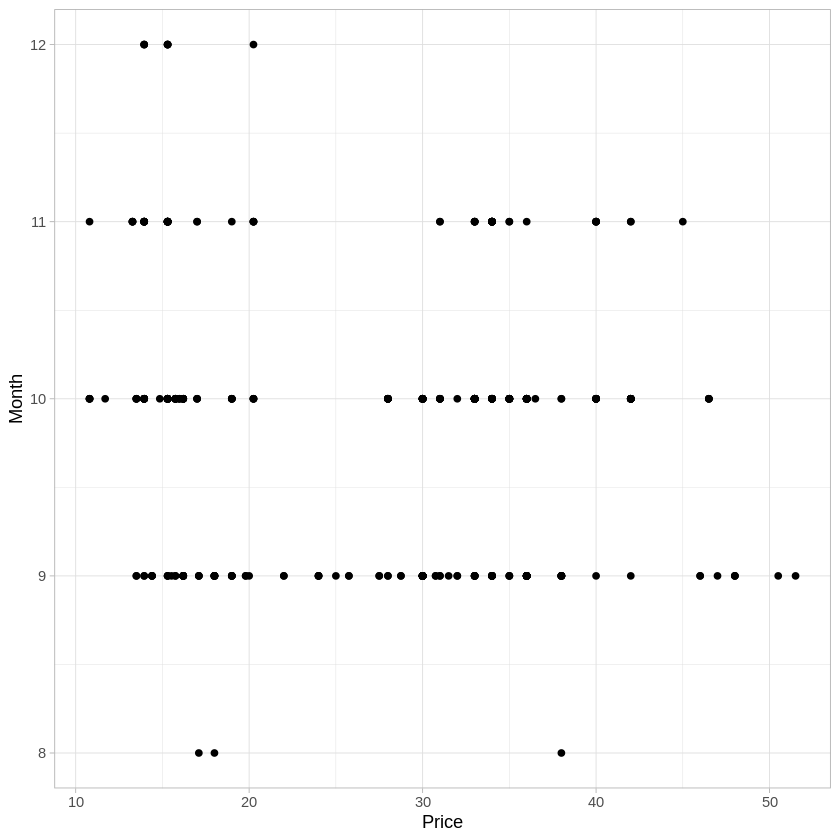

In [12]:
# Set a theme for the plots
theme_set(theme_light())

# Create a scatter plot
p <- ggplot(data = new_pumpkins, aes(x = Price, y = Month))
p + geom_point()

Is this a useful plot 🤷? Does anything about it surprise you?

It's not particularly useful as all it does is display in your data as a spread of points in a given month.
<br>

### **How do we make it useful?**

To get charts to display useful data, you usually need to group the data somehow. For instance in our case, finding the average price of pumpkins for each month would provide more insights to the underlying patterns in our data. This leads us to one more **dplyr** flyby:

#### `dplyr::group_by() %>% summarize()`

Grouped aggregation in R can be easily computed using

`dplyr::group_by() %>% summarize()`

-   `dplyr::group_by()` changes the unit of analysis from the complete dataset to individual groups such as per month.

-   `dplyr::summarize()` creates a new data frame with one column for each grouping variable and one column for each of the summary statistics that you have specified.

For example, we can use the `dplyr::group_by() %>% summarize()` to group the pumpkins into groups based on the **Month** columns and then find the **mean price** for each month.

In [ ]:
# Find the average price of pumpkins per month
new_pumpkins %>%
  group_by(Month) %>% 
  summarise(mean_price = mean(Price))

Succinct!✨

Categorical features such as months are better represented using a bar plot 📊. The layers responsible for bar charts are `geom_bar()` and `geom_col()`. Consult `?geom_bar` to find out more.

Let's whip up one!

In [ ]:
# Find the average price of pumpkins per month then plot a bar chart
new_pumpkins %>%
  group_by(Month) %>% 
  summarise(mean_price = mean(Price)) %>% 
  ggplot(aes(x = Month, y = mean_price)) +
  geom_col(fill = "midnightblue", alpha = 0.7) +
  ylab("Pumpkin Price")

🤩🤩This is a more useful data visualization! It seems to indicate that the highest price for pumpkins occurs in September and October. Does that meet your expectation? Why or why not?

Congratulations on finishing the second lesson 👏! You prepared your data for model building, then uncovered more insights using visualizations!